# Customer Churn Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import warnings

os.chdir('D:\\Data analysis\\Python\\Udemy_Python_course\\DATA')
warnings.filterwarnings(action = 'ignore')

## Importing and Reading the Data

In [3]:
data = pd.read_csv('./Telco-Customer-Churn.csv')
df = data.copy()

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Part 1: Checking the Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


## Part 2: EDA (Exploratory Data Analysis)

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

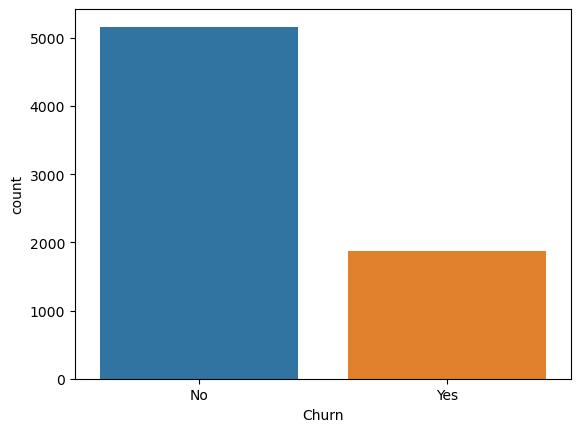

In [7]:
# Displaying the balance of the class labels
sns.countplot(data = df, x ='Churn')
plt.show()

<Axes: xlabel='Churn', ylabel='TotalCharges'>

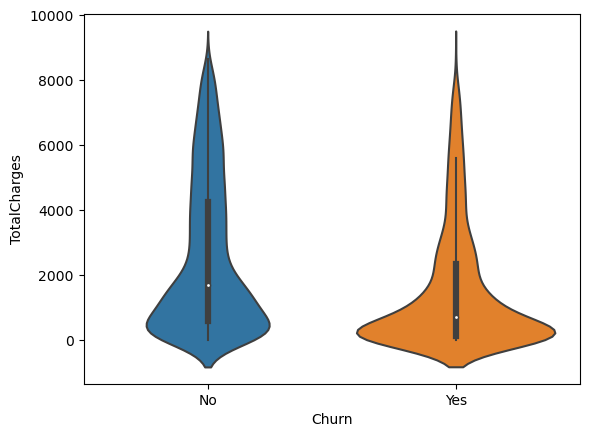

In [8]:
# Distribution of TotalCharges between Churn categories

sns.violinplot(data = df, x = 'Churn', y = 'TotalCharges')

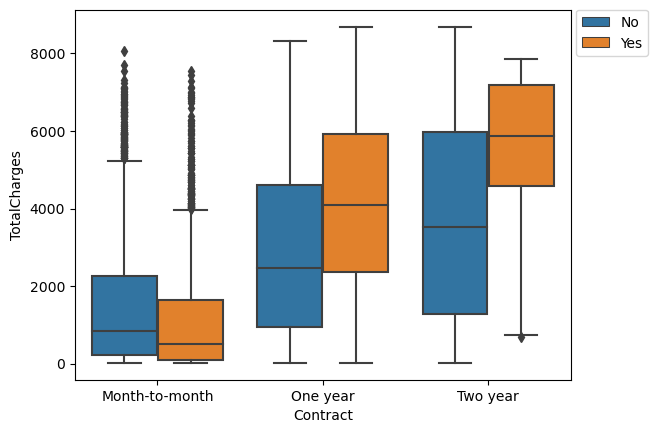

In [9]:
# Distribution of TotalCharges as per Contract type with Churn as hue value

sns.boxplot(data = df, x = 'Contract', y = 'TotalCharges', hue='Churn')
plt.legend(bbox_to_anchor = (1.17,1.02),loc = 'upper right')
plt.show()

In [10]:
# The barplot that shows the correlation between the features to the class labels.
## First we encode the categorical features to numerical to get their correlation
df.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
# for col in df.columns:
#     if df[col].dtype == 'object':
#         df[col] = pd.get_dummies(df[col], drop_first=True)

In [21]:
corr_df = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']]).corr()

In [22]:
# new_df['customerID'] = df['customerID']

# corr_cols = new_df.drop(['customerID','Churn_Yes', 'tenure'], axis = 1)

# corrs = pd.Series(index = corr_cols.columns, data = new_df.corr()['Churn_Yes'])

In [27]:
corr_yes_churn = corr_df.sort_values(by = 'Churn_Yes')['Churn_Yes'].iloc[1:-1]

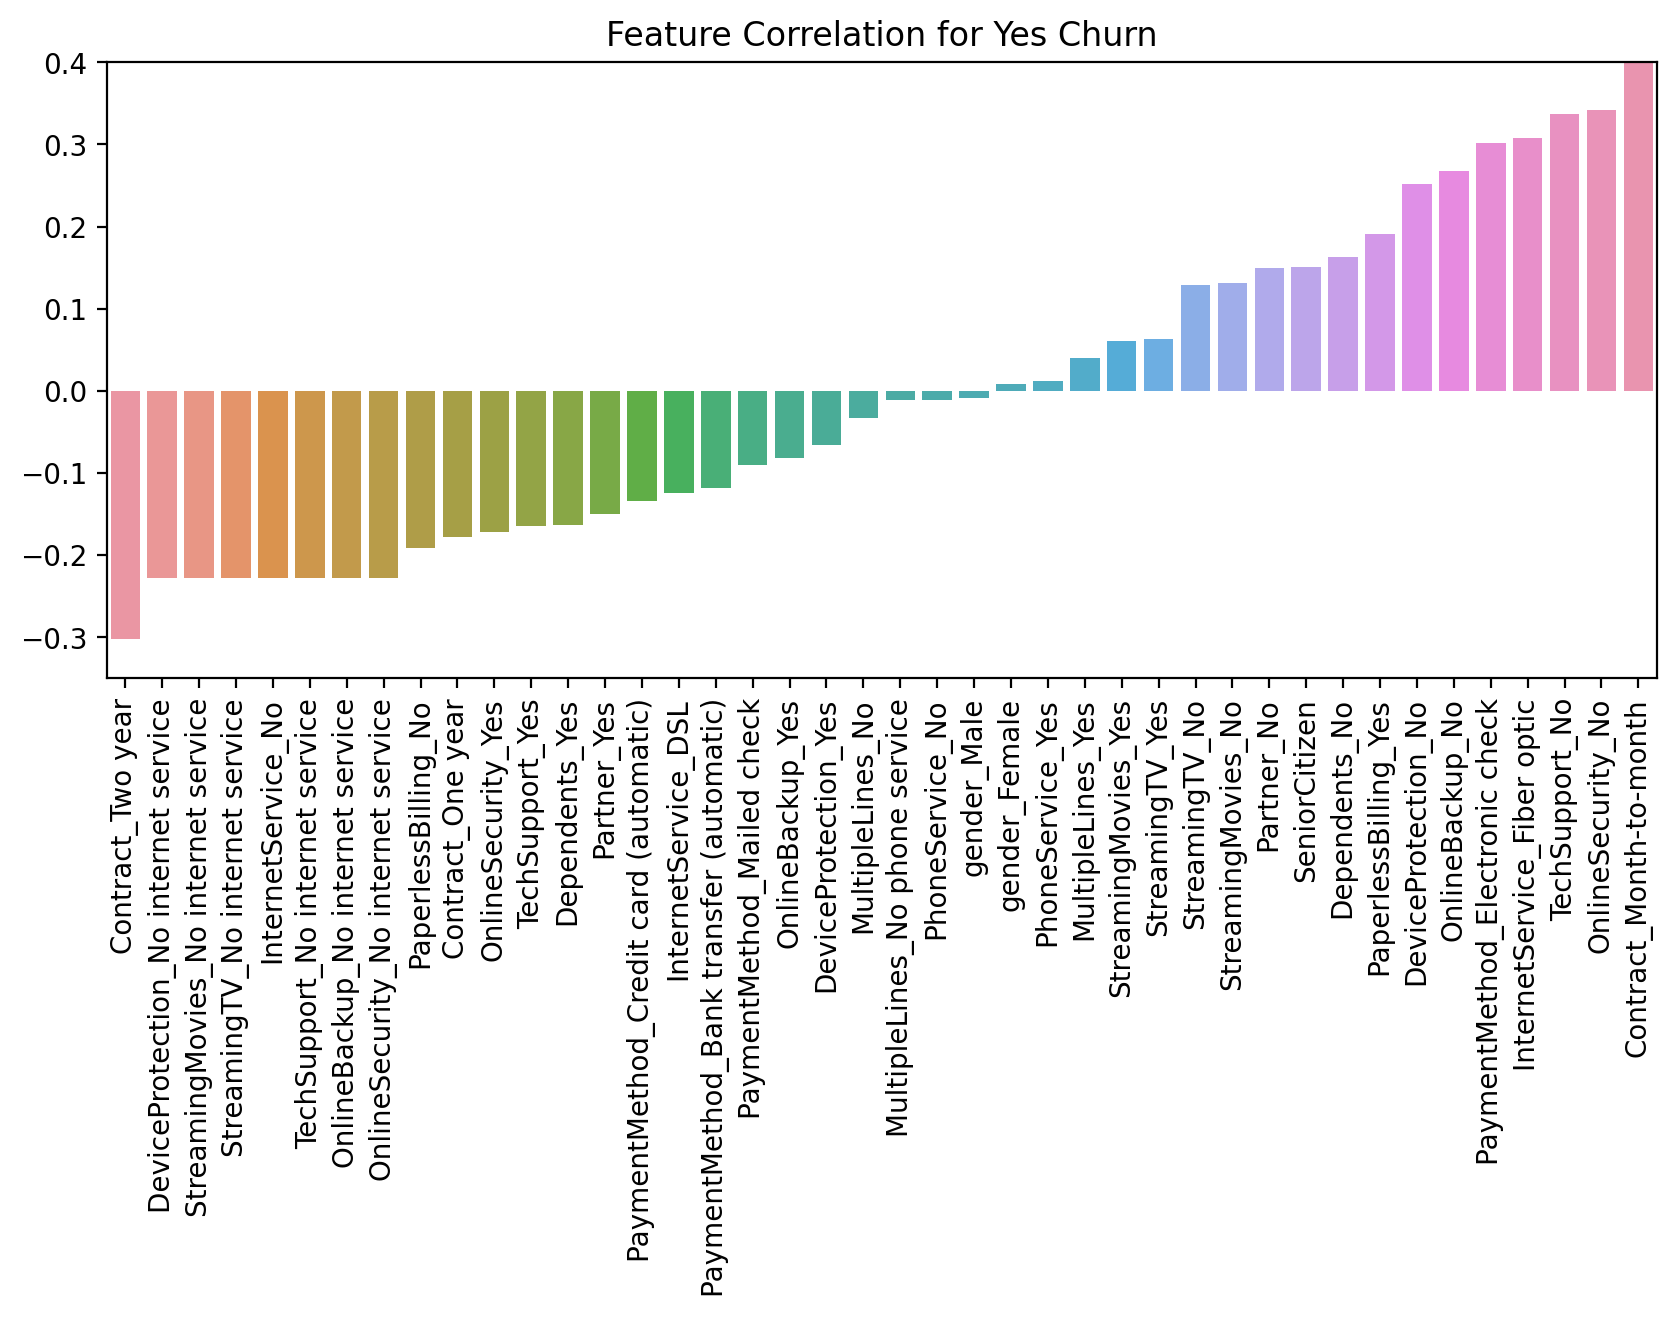

In [31]:
plt.figure(figsize = (10,4),dpi = 200)

sns.barplot(x = corr_yes_churn.index ,y = corr_yes_churn.values)
plt.xticks(rotation = 90)
plt.ylim((-0.35,0.4))
plt.title('Feature Correlation for Yes Churn');

## Part 4: Churn Analysis

In [16]:
df['Contract'].value_counts().index

Index(['Month-to-month', 'Two year', 'One year'], dtype='object')

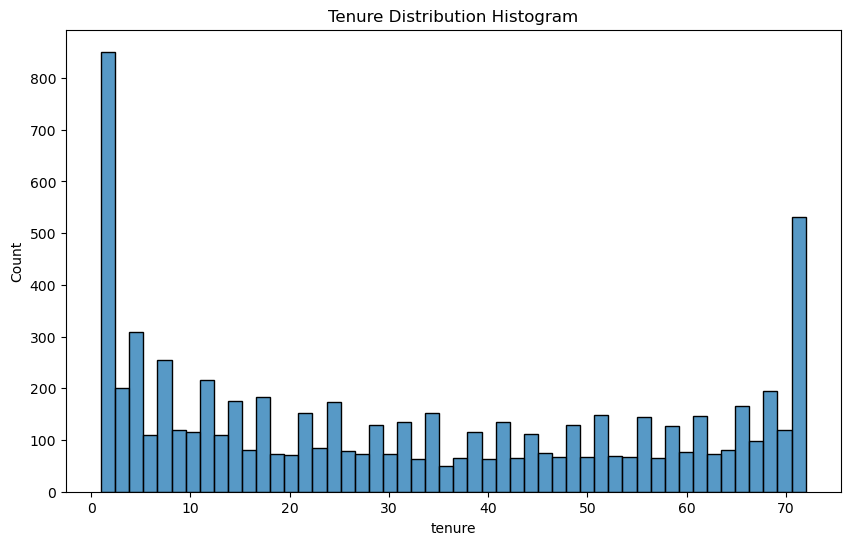

In [17]:
## Displaying a histogram of tenure

plt.figure(figsize=(10,6))

sns.histplot(data = new_df,x = 'tenure', bins = 50)
plt.title('Tenure Distribution Histogram');


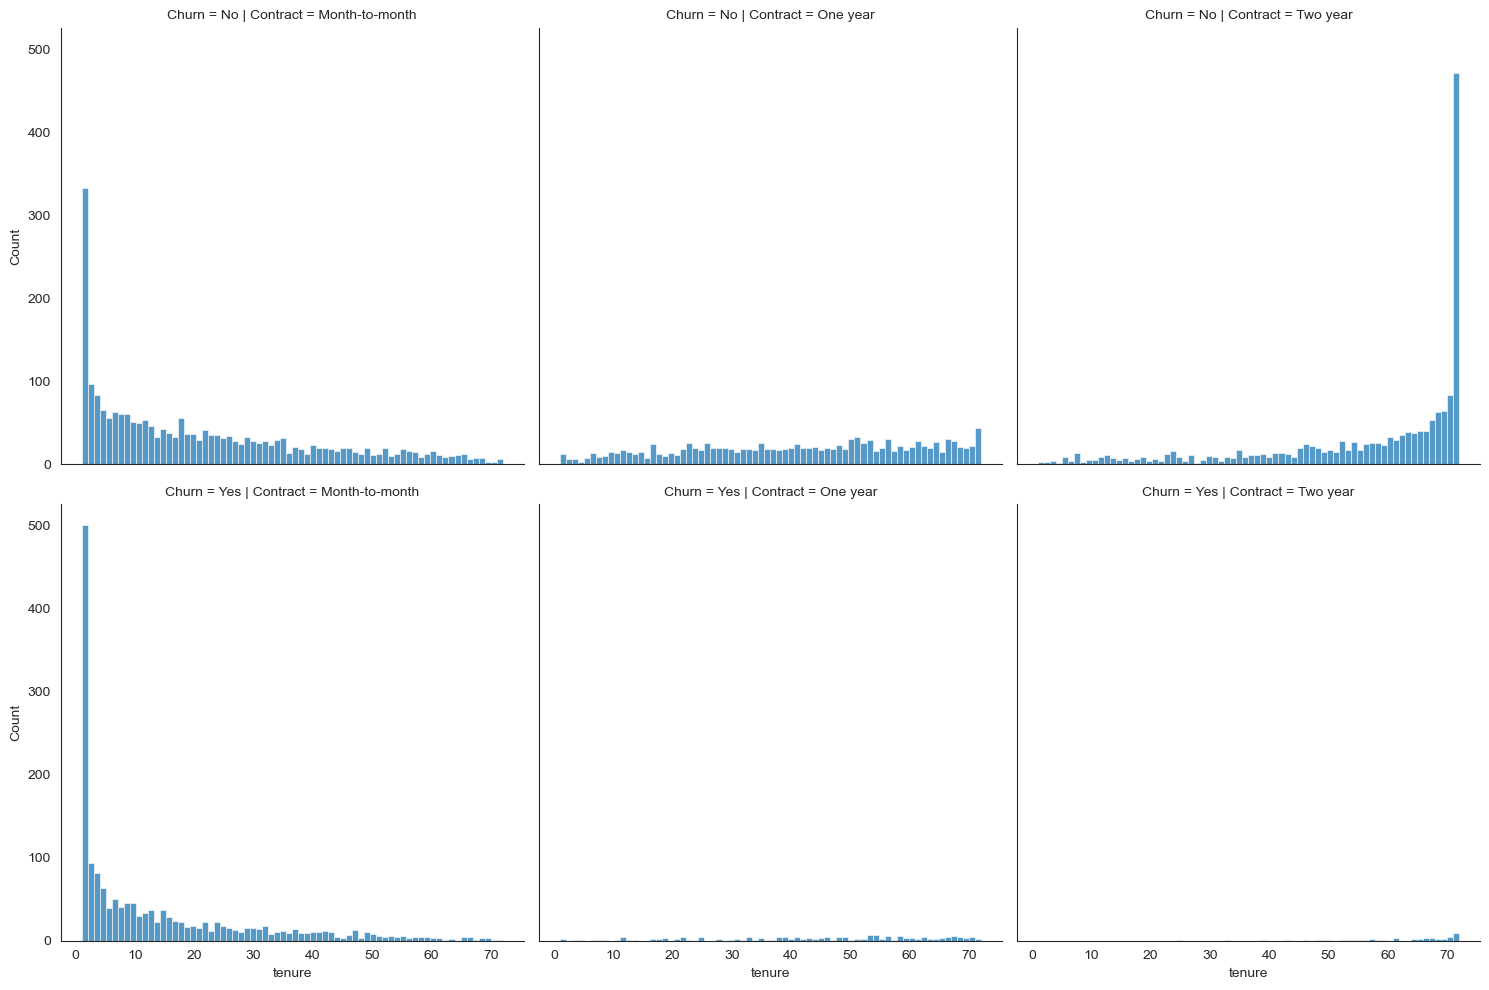

In [318]:
# ## Histograms separated by Churn and Contract

sns.displot(data = df, x = 'tenure',bins = 70,col = 'Contract',row = 'Churn')

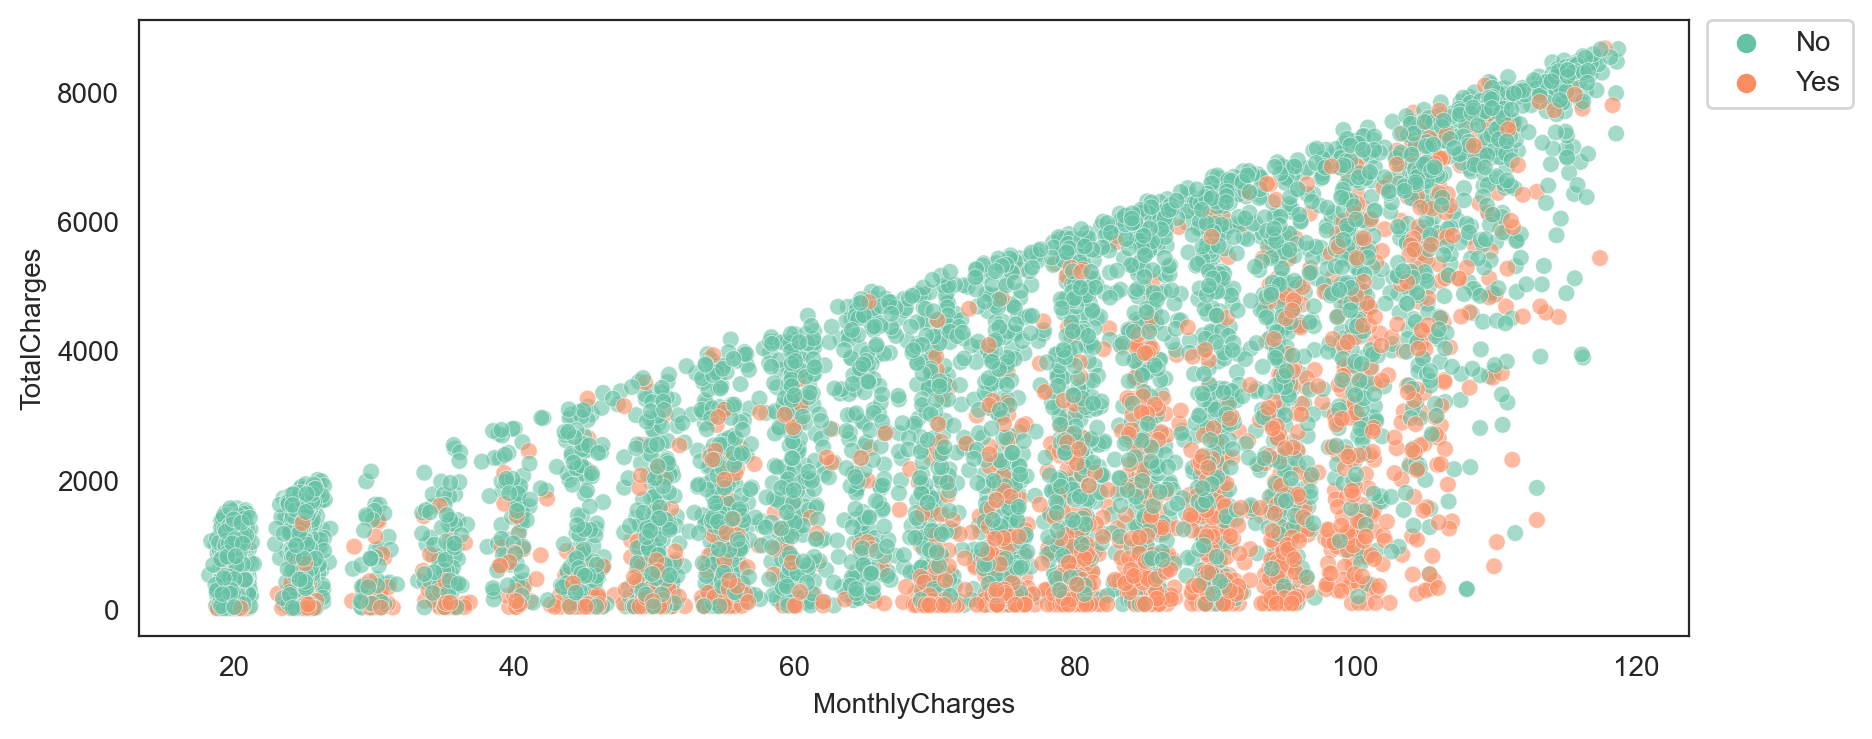

In [41]:
## Scatterplot of TotalCharges versus MonthlyCharges with hue = 'Churn'
sns.set_style('white')
plt.figure(figsize = (10,4),dpi = 200)
sns.scatterplot(data = df, y = 'TotalCharges', x = 'MonthlyCharges', hue = 'Churn',palette='Set2', alpha = 0.6,linewidth = 0.3)

plt.legend(bbox_to_anchor = (1.012,0.8581), loc = (1,1));

### Creating Cohorts (Groups to separate the data and treat each group individually to find the Churn rate)

In [21]:
# pcntg = []

# for idx,val in enumerate(cohort, start=1):
#     pct = 100*val/len(df[df['tenure']==idx])
#     pcntg.append(pct)

In [62]:
## Grouped people by who did churned
cohort = df[df['Churn']=='Yes'].groupby('tenure').count()

## Then calculated the total number of people during that tenure
total_tenure_len = [len(df[df['tenure']==i]) for i in cohort.index]

## Calculated pctngs
churn_pct = 100*cohort['customerID']/total_tenure_len

churn_pct

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

Text(0, 0.5, 'Churn Rate')

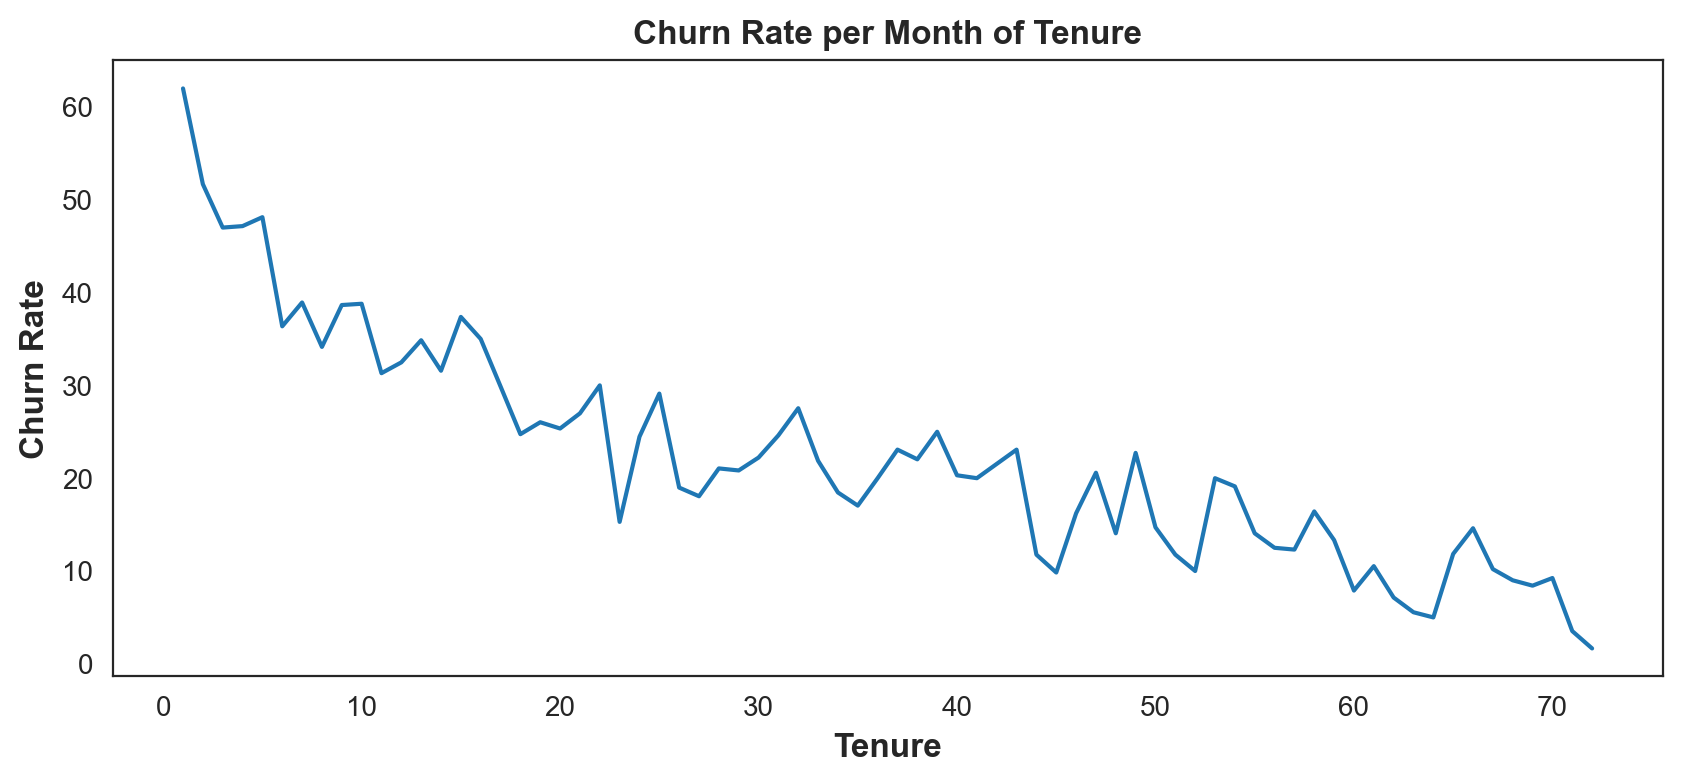

In [63]:
plt.figure(figsize = (10,4),dpi = 200)

sns.lineplot(x = churn_pct.index, y = churn_pct.values)

plt.title('Churn Rate per Month of Tenure',fontweight = 'bold', fontsize = 12)
plt.xlabel('Tenure', fontweight = 'bold', fontsize = 12)
plt.ylabel('Churn Rate', fontweight = 'bold', fontsize = 12)

### Creating a column Tenure Cohort that creates 4 separate categories

In [66]:
## This is a fucntion that sorts out the tenure months and fills the new_column
# with the strings applied when used with apply function

def tenure_cohort(x):
    if x>0 and  x<=12:
        return '0-12 Months'
    elif x>12 and  x<=24:
        return '12-24 Months'
    elif x>24 and  x<=48:
        return '24-48 Months'
    else:
        return 'Over 48 Months'
    
df['Tenure_Cohort'] = df['tenure'].apply(tenure_cohort)

In [67]:
df['Tenure_Cohort'].value_counts()

Over 48 Months    2239
0-12 Months       2175
24-48 Months      1594
12-24 Months      1024
Name: Tenure_Cohort, dtype: int64

In [68]:
df[['tenure', 'Tenure_Cohort']].head(10)

,tenure,Tenure_Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
5,8,0-12 Months
6,22,12-24 Months
7,10,0-12 Months
8,28,24-48 Months
9,62,Over 48 Months


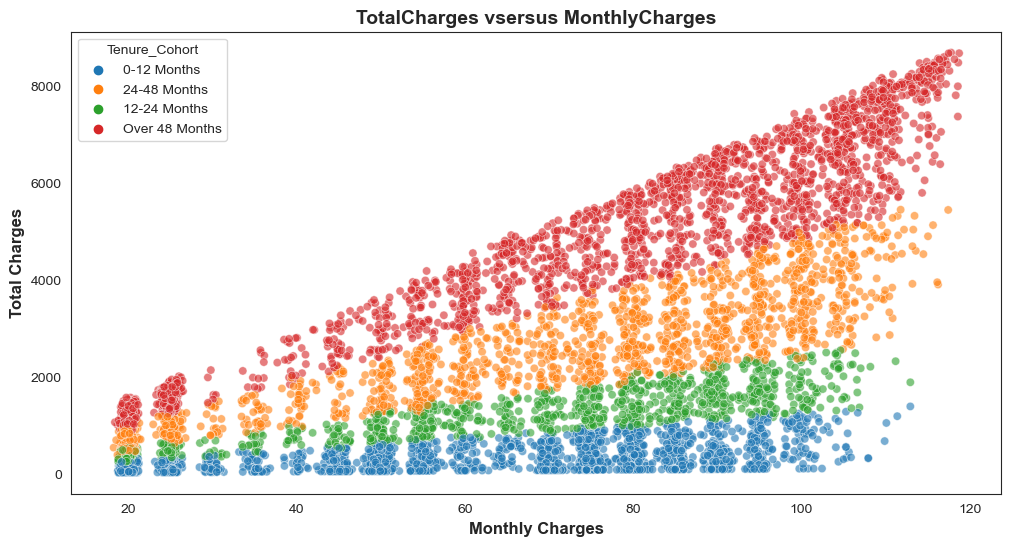

In [69]:
## Scatterplot of Total Charges versus Monthly charges colored by Tenure Cohort

plt.figure(figsize = (12,6))

sns.scatterplot(data = df, y = 'TotalCharges', x = 'MonthlyCharges', hue = 'Tenure_Cohort', alpha = 0.6)

plt.title('TotalCharges vsersus MonthlyCharges', fontweight = 'bold', fontsize= 14)

plt.xlabel('Monthly Charges',fontsize = 12, fontweight ='bold')
plt.ylabel('Total Charges',fontsize = 12, fontweight ='bold');

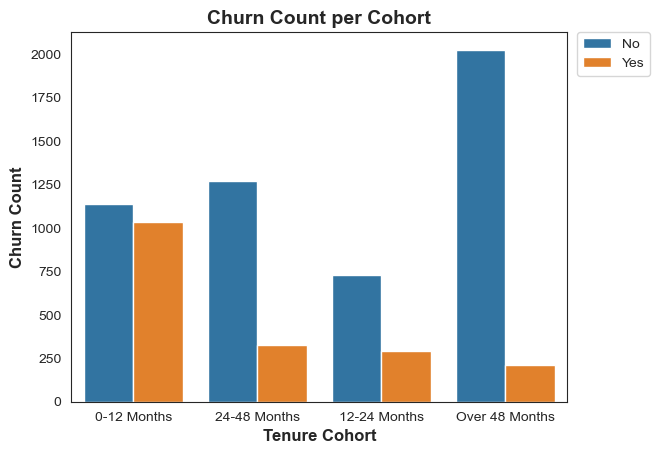

In [70]:
## Count plot showing Churn Count per Cohort

sns.countplot( x = df['Tenure_Cohort'],hue = df['Churn'])

plt.title('Churn Count per Cohort', fontweight = 'bold', fontsize= 14)

plt.xlabel('Tenure Cohort',  fontweight = 'bold', fontsize= 12)
plt.ylabel('Churn Count',  fontweight = 'bold', fontsize= 12)

plt.legend(bbox_to_anchor = (1.02,0.882), loc = (1,1));

<Figure size 1500x900 with 0 Axes>

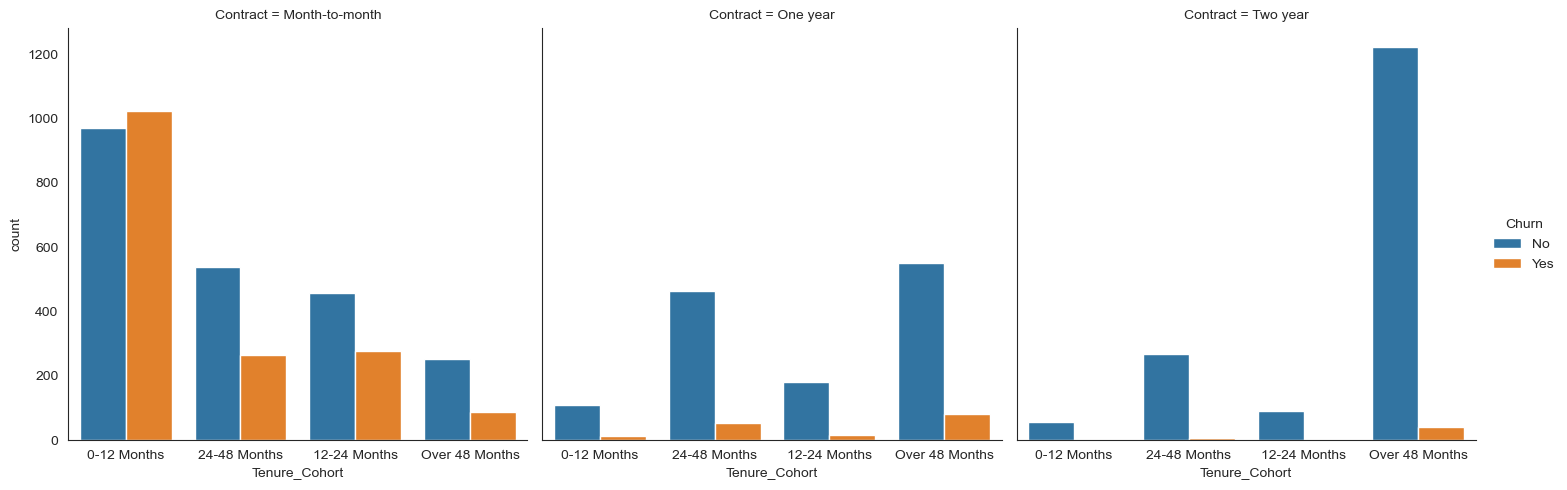

In [72]:
## Grid of countplots showing counts per Tenure Cohort, separated by contract type and colored by the Churn hue
plt.figure(figsize=(10,6), dpi = 150)
# sns.displot(data = df, x = 'Tenure_Cohort', col = 'Contract',hue = 'Churn',multiple = 'dodge');
sns.catplot(data = df, x = 'Tenure_Cohort', col = 'Contract',hue = 'Churn',kind='count');

## Part 5: Modeling

In [87]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay,confusion_matrix

In [98]:
X = df.drop(['customerID','Churn'], axis = 1)

X = pd.get_dummies(data = X, drop_first=True,dtype=int)

In [99]:
y = final_df['Churn_Yes']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

In [101]:
dt_model = DecisionTreeClassifier(min_samples_leaf=100,max_depth=20,criterion = 'gini')

dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=100)

In [102]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

rand_model = RandomizedSearchCV(estimator=dt_model,param_distributions=params)

rand_model.fit(X_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(max_depth=20,
                                                    min_samples_leaf=100),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 5, 10, 20],
                                        'min_samples_leaf': [5, 10, 20, 50,
                                                             100]})

In [103]:
rand_model.best_params_

{'min_samples_leaf': 100, 'max_depth': 20, 'criterion': 'gini'}

In [104]:
y_pred_rand = rand_model.predict(X_test)

In [105]:
y_pred = dt_model.predict(X_test)

In [106]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       557
           1       0.57      0.42      0.49       147

    accuracy                           0.81       704
   macro avg       0.72      0.67      0.69       704
weighted avg       0.80      0.81      0.80       704



In [107]:
con_max = confusion_matrix(y_test, y_pred, labels=dt_model.classes_)

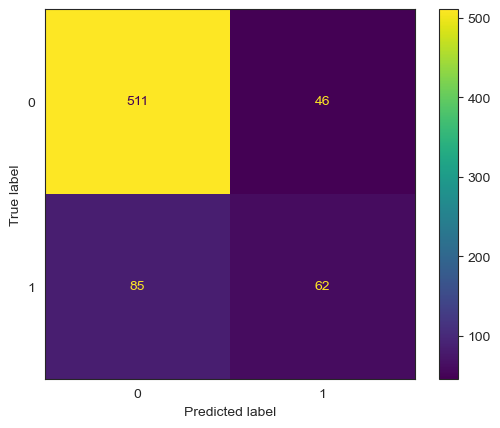

In [108]:
display = ConfusionMatrixDisplay(confusion_matrix=con_max,display_labels = dt_model.classes_)
display.plot()

### Feature Importance for Decision Tree

In [132]:
feat_imp = pd.DataFrame(data = dt_model.feature_importances_,index=X.columns,
             columns = ['Feat Imp'])

feat_imp = feat_imp.sort_values('Feat Imp')

feat_imp = feat_imp[feat_imp['Feat Imp'] > 0]

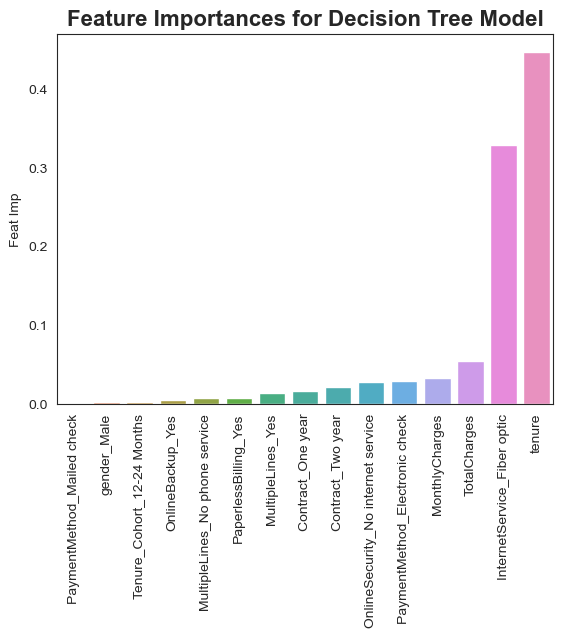

In [138]:
sns.barplot(data = feat_imp, x = feat_imp.index, y = 'Feat Imp')

plt.title('Feature Importances for Decision Tree Model', fontweight = 'bold', fontsize = 16)

plt.xticks(rotation = 90);

In [127]:
# pd.Series(dt_model.feature_importances_,index = X.columns).nlargest(14).sort_values(ascending=True).plot(kind = 'bar')

# plt.title('Feature Importances for Decision Tree Model', fontweight = 'bold', fontsize = 16);

## Plotting a tree

In [139]:
from sklearn.tree import plot_tree

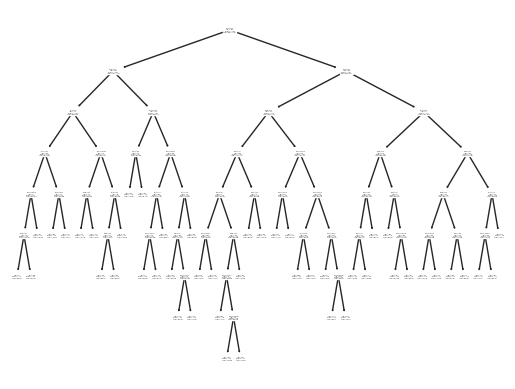

In [141]:
plot_tree(dt_model);

In [142]:
rf_model = RandomForestClassifier(max_depth=6)

rf_model.fit(X_train,y_train)

y_rf_pred = rf_model.predict(X_test)

In [143]:
print(classification_report(y_test,y_rf_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       557
           1       0.60      0.45      0.51       147

    accuracy                           0.82       704
   macro avg       0.73      0.68      0.70       704
weighted avg       0.81      0.82      0.81       704



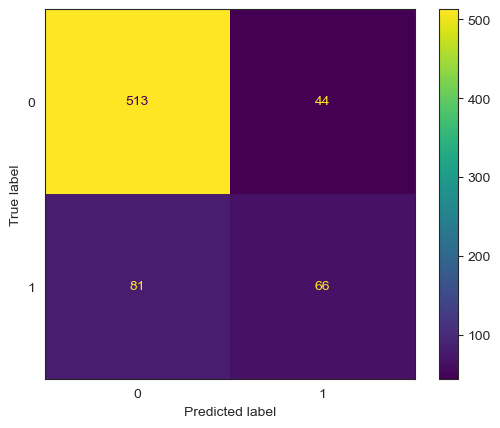

In [159]:
con_max = confusion_matrix(y_test, y_rf_pred, labels=rf_model.classes_)

display = ConfusionMatrixDisplay(confusion_matrix=con_max,display_labels = rf_model.classes_)
display.plot()

In [147]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

              precision    recall  f1-score   support

           0       0.87      0.90      0.89       557
           1       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



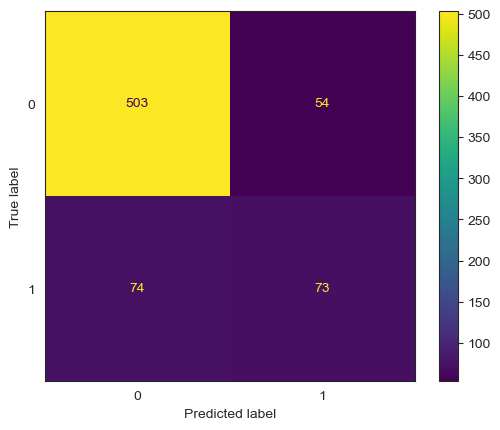

In [161]:
gb_model = GradientBoostingClassifier()

gb_model.fit(X_train,y_train)

y_gb_pred = gb_model.predict(X_test)

print(classification_report(y_test,y_gb_pred))

con_max = confusion_matrix(y_test, y_gb_pred, labels = gb_model.classes_)

display = ConfusionMatrixDisplay(confusion_matrix=con_max,display_labels = gb_model.classes_)
display.plot()

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       557
           1       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



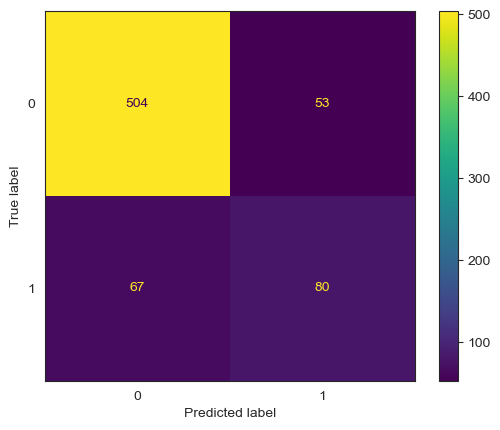

In [167]:
## Ada boost gave us the best performance on default settings so we will try to use a GridSearch on AdaBoost

ada_model = AdaBoostClassifier()

ada_model.fit(X_train,y_train)

y_ada_pred = ada_model.predict(X_test)

print(classification_report(y_test,y_ada_pred))

con_max = confusion_matrix(y_test, y_ada_pred, labels=ada_model.classes_)

display = ConfusionMatrixDisplay(confusion_matrix=con_max,display_labels = ada_model.classes_)
display.plot()

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       557
           1       0.61      0.52      0.56       147

    accuracy                           0.83       704
   macro avg       0.74      0.71      0.73       704
weighted avg       0.82      0.83      0.82       704



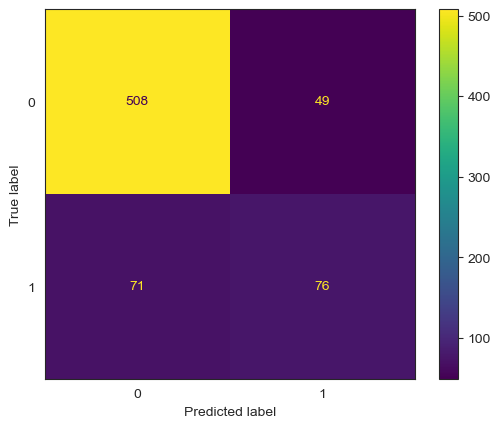

In [165]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators':list(range(1,100,5)),
              'learning_rate':[0.001,0.05,0.07,0.12,0.5,1]
             }

grid_ada_model = GridSearchCV(estimator=ada_model,param_grid=param_grid)

grid_ada_model.fit(X_train,y_train)

y_grid_pred = grid_ada_model.predict(X_test)

print(classification_report(y_test,y_grid_pred))

con_max = confusion_matrix(y_test, y_grid_pred, labels=grid_ada_model.classes_)

display = ConfusionMatrixDisplay(confusion_matrix=con_max,display_labels = grid_ada_model.classes_)
display.plot()